# **Credit Card Fraud Detection**

## Import the Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, precision_recall_curve, auc, confusion_matrix
%matplotlib inline

## Load the dataset

In [5]:
# Function to load the dataset
def load_data(file_path):
    # Load a CSV file
    try:
        data = pd.read_csv(file_path)
        print('Data Loaded Successfully!')
        return data
    except FileNotFoundError:
        print(f"Error: The File {file_path} was not found.")
        return None

data = load_data('/content/credit_card.csv')
data

Data Loaded Successfully!


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Kaggle Dataset:**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have **492 frauds** out of **284,807 transactions.** The dataset is **highly unbalanced**, the **positive class (frauds) account for 0.172%** of all transactions.

It contains only **numerical input variables** which are the result of a **PCA transformation**. Unfortunately, due to **confidentiality issues**, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the **Area Under the Precision-Recall Curve (AUPRC).** Confusion matrix accuracy is not meaningful for unbalanced classification.

## Basic EDA

In [23]:
# Check the total amount in transactions
print(f"Total Amount in Transactions: € {round(data['Amount'].sum(), None)}")

# Info about the dataset
print(f"\nShape of the dataset: {data.shape} \n")
print(data.info())

Total Amount in Transactions: € 25162590

Shape of the dataset: (284807, 31) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19    

In [8]:
# Function to check for missing values
def null_values(data):
    if data.isnull().values.any():
        print('There are missing values in the dataset.')
    else:
        print('There are no missing values in the dataset.')

null_values(data)

There are no missing values in the dataset.


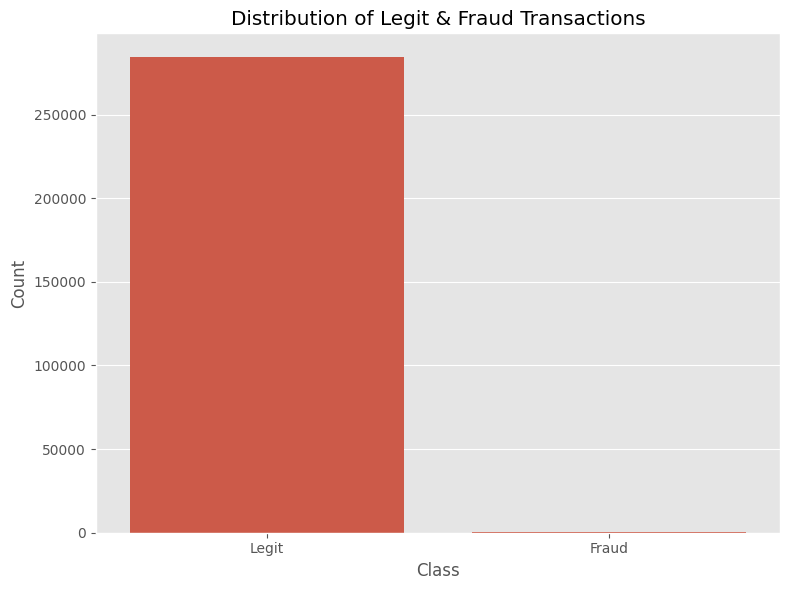

In [9]:
# Check the Distribution between 2 types of transactions (Legit & Fraud)
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Class'].replace({0:'Legit', 1:'Fraud'}), data=data)
plt.title('Distribution of Legit & Fraud Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Result:** Highly Imbalanced data **(99.827% legit transactions)**

## Undersampling

**Undersampling:** Data preprocessing technique that reduces the no. of samples in the majority class of a dataset to balance the class distribution.

\
*Create a sample dataset containing similar distributions of legit and fraud transactions.*

In [10]:
# Function to separate the data for analysis
def separate_data(data):
    legit = data[data['Class'] == 0]
    fraud = data[data['Class'] == 1]
    return legit, fraud

legit, fraud = separate_data(data)
legit.shape, fraud.shape

((284315, 31), (492, 31))

In [11]:
# Statistical Analysis of Amount column in Legit transactions
legit['Amount'].describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [12]:
# Statistical Analysis of Amount column in Fraud transactions
fraud['Amount'].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [13]:
# Compare values of both legit & fraud transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
# Function to create a new undersampled data
def undersample_data(legit, fraud):
    legit_sample = legit.sample(n=fraud.shape[0])
    # Concatenate both the data
    new_data = pd.concat([legit_sample, fraud], axis=0)
    return new_data

new_data = undersample_data(legit, fraud)
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13553,24037.0,-2.485244,2.639332,-0.359858,0.494223,-1.388818,-0.320065,-1.490856,1.905369,0.358712,...,0.159351,0.040990,0.034076,-0.461706,-0.166903,0.362231,-0.827714,-0.139365,5.75,0
14314,25392.0,-0.829840,0.902751,1.101257,-0.707799,0.467336,-0.432122,0.870202,0.053977,-0.526561,...,0.136557,0.188836,-0.150558,-0.002626,-0.155511,0.151353,-0.228816,0.097313,7.39,0
15139,26487.0,1.098916,-0.206671,0.999466,0.952225,-0.807691,-0.040461,-0.379314,0.076399,0.853622,...,-0.076921,0.138410,-0.017476,0.489680,0.411655,0.533334,0.012842,0.017783,25.75,0
6381,7588.0,-1.147230,1.550357,2.139605,1.149450,-0.106060,-0.490941,1.072588,-0.872074,1.971833,...,-0.399128,0.023801,-0.246340,0.637656,-0.422566,-0.606740,-0.682773,-0.914330,36.00,0
118072,74938.0,1.228799,0.372022,0.545784,1.098388,-0.367350,-0.879014,0.126363,-0.184882,0.009104,...,-0.227709,-0.652247,0.099363,0.348870,0.377609,-0.631463,0.025955,0.030361,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


Concatenate the two DataFrames (fraud & legit_sample) to get an equally distributed dataframe (492 legit & 492 fraud).

In [15]:
new_data['Class'].value_counts()

,count
Class,
0,492
1,492


In [16]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91952.851626,0.006837,-0.020518,0.017138,0.011922,0.050030,0.075326,0.053508,-0.027610,0.023877,...,-0.036100,-0.073616,-0.044390,0.011477,0.028353,0.015704,0.015311,-0.031795,0.033893,84.438232
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


The nature of the dataset has not changed after creating a new dataset.

## Split the dataset

In [17]:
# Function to split the dataset into training and test dataset
def split_data(new_data):
    X = new_data.drop(columns=['Class'])
    y = new_data['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=3)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(new_data)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((787, 30), (197, 30), (787,), (197,))

## Preprocessing the data

In [18]:
# Function to scale the features
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_features(X_train, X_test)
X_train_scaled, X_test_scaled

(array([[-0.84682655,  0.62786784, -0.5704557 , ..., -0.02759779,
         -0.08412245, -0.39172423],
        [-0.91978405, -2.13386175,  1.23805649, ..., -1.67888499,
         -1.26675662, -0.3880026 ],
        [-0.49113031,  0.13399757,  0.36867459, ...,  0.30540062,
          0.39177513, -0.40148852],
        ...,
        [ 1.72565378,  0.69351467, -0.12910352, ...,  0.29963626,
          0.2030065 , -0.42493882],
        [ 0.62647698,  0.73400574, -0.86517704, ..., -0.00984583,
         -0.18837796, -0.07182372],
        [ 1.16639557,  0.22195181,  0.02615068, ..., -0.35713474,
         -1.4252966 ,  0.87095038]]),
 array([[ 1.49678086,  0.29203822, -0.29956459, ..., -0.22387115,
         -0.24343636,  0.2002958 ],
        [-0.89579548, -0.27294026,  0.43500772, ...,  0.66470283,
         -0.4527057 , -0.4239784 ],
        [ 1.3455144 , -0.01021111, -0.02911045, ...,  0.0505169 ,
          0.38048686, -0.39080383],
        ...,
        [-1.04759915,  0.65299681, -0.38686294, ..., -

## Model Training

In [73]:
# Function to train the model
def train_model(X_train_scaled, y_train, model_type):
    if model_type == 'logistic':
        model = LogisticRegression(random_state=42)
    elif model_type == 'random_forest':
        param_grid = {
            'n_estimators': [150, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [2, 4],
            'max_features': ['sqrt', 'log2'],
            'class_weight': ['balanced', {0: 1, 1: 10}]
        }

        model = RandomForestClassifier(random_state=42)
        grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='recall', verbose=0)
        grid_search.fit(X_train_scaled, y_train)

        print('Best parameters found:', grid_search.best_params_)
        return grid_search.best_estimator_
    else:
        raise ValueError("Invalid model type. Choose 'logistic' or 'random_forest'.")

    model.fit(X_train_scaled, y_train)
    return model

### Logistic Regression (Baseline Model)

In [74]:
# Train the Logistic Regression model
# Use scaled train data
lr = train_model(X_train_scaled, y_train, model_type='logistic')
lr

LogisticRegression(random_state=42)

### Random Forest (Hyperparameters Tuned)

In [75]:
# Train the Random Forest model with hyperparameters
# Use scaled train data
rf = train_model(X_train_scaled, y_train, model_type='random_forest')
rf

Best parameters found: {'class_weight': {0: 1, 1: 10}, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=10,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

## Model Evaluation

In [89]:
# Function to evaluate the model on training data
def evaluate_model_train(model, X_train_scaled, y_train):
    y_train_pred = model.predict(X_train_scaled)
    y_train_prob = model.predict_proba(X_train_scaled)[:, 1]
    print('Confusion Matrix:\n', confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred, labels=[0, 1], target_names=['Legit', 'Fraud']))
    print('Recall:', recall_score(y_train, y_train_pred))
    print('AUPRC:', auc(precision_recall_curve(y_train, y_train_prob)[1], precision_recall_curve(y_train, y_train_prob)[0]))

# Function to evaluate the model on test data
def evaluate_model_test(model, X_test_scaled, y_test):
    y_test_pred = model.predict(X_test_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)[:, 1]
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred, labels=[0, 1], target_names=['Legit', 'Fraud']))
    print('Recall:', recall_score(y_test, y_test_pred))
    print('AUPRC:', auc(precision_recall_curve(y_test, y_test_prob)[1], precision_recall_curve(y_test, y_test_prob)[0]))

### Logistic Regression

Training Data Metrics

In [90]:
evaluate_model_train(lr, X_train_scaled, y_train)

Confusion Matrix:
 [[385   8]
 [ 32 362]]
              precision    recall  f1-score   support

       Legit       0.92      0.98      0.95       393
       Fraud       0.98      0.92      0.95       394

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787

Recall: 0.9187817258883249
AUPRC: 0.9892529301613209


Test Data Metrics

In [91]:
evaluate_model_test(lr, X_test_scaled, y_test)

Confusion Matrix:
 [[98  1]
 [ 8 90]]
              precision    recall  f1-score   support

       Legit       0.92      0.99      0.96        99
       Fraud       0.99      0.92      0.95        98

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197

Recall: 0.9183673469387755
AUPRC: 0.9871933482962875


### Random Forest

Train Data Metrics

In [80]:
# Evaluate the model on training data
evaluate_model_train(rf, X_train_scaled, y_train)

              precision    recall  f1-score   support

       Legit       1.00      0.97      0.98       393
       Fraud       0.97      1.00      0.98       394

    accuracy                           0.98       787
   macro avg       0.98      0.98      0.98       787
weighted avg       0.98      0.98      0.98       787

Recall: 1.0
AUPRC: 0.9996347024586694


Test Data Metrics

In [81]:
# Evaluate the model on test data
evaluate_model_test(rf, X_test_scaled, y_test)

              precision    recall  f1-score   support

       Legit       0.94      0.96      0.95        99
       Fraud       0.96      0.94      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

Recall: 0.9387755102040817
AUPRC: 0.9906748629167432


## Conclusion

Here is a summary table for both the models

In [99]:
# Create a summary table
summary_table = pd.DataFrame({
    'Metrics': ['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision',
               'Train Recall', 'Test Recall', 'Train AUPRC', 'Test AUPRC'],
    'Logistic Regression': [
        accuracy_score(y_train, lr.predict(X_train_scaled)),
        accuracy_score(y_test, lr.predict(X_test_scaled)),
        precision_score(y_train, lr.predict(X_train_scaled)),
        precision_score(y_test, lr.predict(X_test_scaled)),
        recall_score(y_train, lr.predict(X_train_scaled)),
        recall_score(y_test, lr.predict(X_test_scaled)),
        auc(precision_recall_curve(y_train, lr.predict_proba(X_train_scaled)[:, 1])[1],
            precision_recall_curve(y_train, lr.predict_proba(X_train_scaled)[:, 1])[0]),
        auc(precision_recall_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1])[1],
            precision_recall_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1])[0])
],
    'Random Forest': [
        accuracy_score(y_train, rf.predict(X_train_scaled)),
        accuracy_score(y_test, rf.predict(X_test_scaled)),
        precision_score(y_train, rf.predict(X_train_scaled)),
        precision_score(y_test, rf.predict(X_test_scaled)),
        recall_score(y_train, rf.predict(X_train_scaled)),
        recall_score(y_test, rf.predict(X_test_scaled)),
        auc(precision_recall_curve(y_train, rf.predict_proba(X_train_scaled)[:, 1])[1],
            precision_recall_curve(y_train, rf.predict_proba(X_train_scaled)[:, 1])[0]),
        auc(precision_recall_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1])[1],
            precision_recall_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1])[0])
]
})

summary_table = summary_table.set_index('Metrics')
summary_table

,Logistic Regression,Random Forest
Metrics,,
Train Accuracy,0.949174,0.983482
Test Accuracy,0.954315,0.949239
Train Precision,0.978378,0.968059
Test Precision,0.989011,0.958333
Train Recall,0.918782,1.000000
Test Recall,0.918367,0.938776
Train AUPRC,0.989253,0.999635
Test AUPRC,0.987193,0.990675


**Summary of Results:**

> The improved **Random Forest** model is the best among the two **(High Recall score)**.

> Although, the **AUPRC** is **~1** for training set (which shows overfitting), the model performs well with **AUPRC** of **~0.99** on unseen test data as well.

> Note: The Recall score in test data is the most important in fraud detection models as it indicates missed fraud transactions.
\
So, from the metrics **(Recall ~94%)**, we come to know that only **~6%** frauds are missed with **Random Forest**, whereas the **Logistic Regression(~92%)** model misses **~8%.**

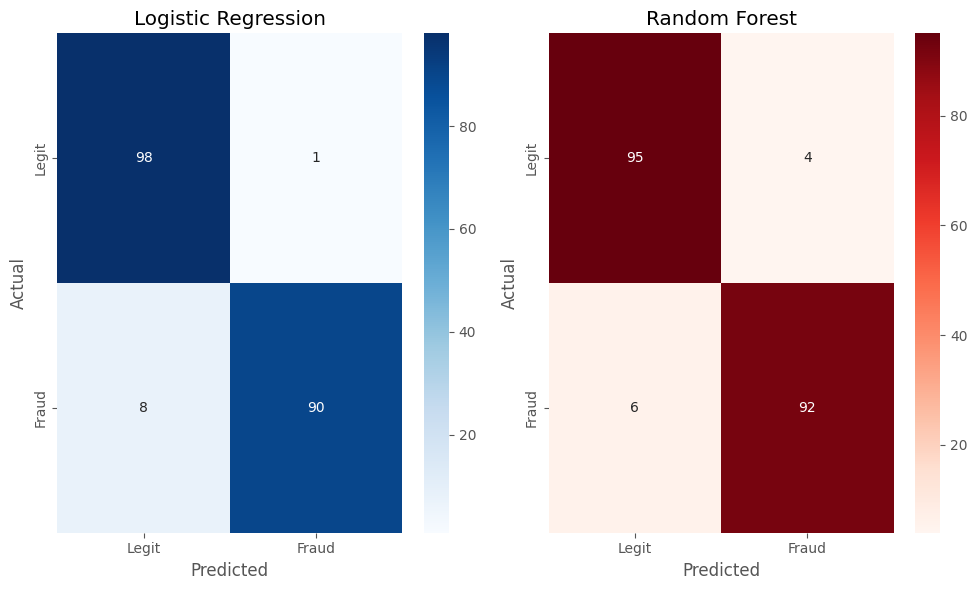

In [98]:
# Plot Confusion Matrix for both the models
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_scaled)), annot=True, fmt='g', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test_scaled)), annot=True, fmt='g', cmap='Reds', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

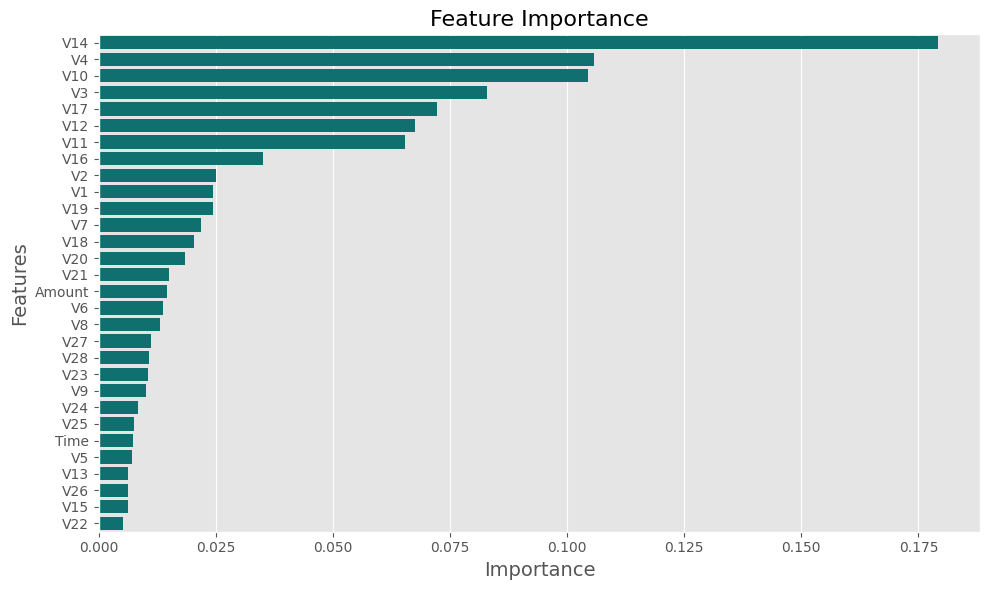

In [ ]:
# Feature importance
importances = rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

# Plotting feature importances
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], color='teal')
plt.title("Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

**Result:** The feature **V14** contributes the most to fraud detection.